# Assignment 3: Ensemble Methods and Unsupervised Learning
## Applied Machine Learning (BUAN 6341)

### <font color='red'>Due Date: April 29, 2022 11:59 pm</font> 

Deliverables:

- Write down your codes in the given cells described in this file, denoted as "YOUR CODE HERE"
- Write down your discussion in the given cells, denoted as "YOUR DISCUSSION HERE"
- Submit one file: .ipynb file to eLearning
- There is no conceptual problem for this assignment.

The total score of the implementation part is: 100

In [1]:
NAME = "Akhil Chandhoke"

In [15]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### The MNIST Dataset

The famous MNIST (hand-written digits) dataset contains 60,000 hand-written digit pictures (grayscale), each cut into 28 * 28 grids. It has been broadly applied to examine the performance of classification, clustering, and deep learning algorithms. The original dataset can be loaded using syntax: keras.datasets.mnist.load_data

In this assignment, we will use a simplified version of this dataset, which contains 1797 hand-written digit pictures (grayscale), each cut in 8 * 8 grids. This simplified dataset reduces computation complexity. The simplified dataset can be loaded using: sklearn.datasets.load_digits.

Run the cell below to (1) load the data and get a brief overview of it; (2) plot some of the pictures to get an intuitive understanding; and (3) split the data.

In [16]:
# Loading Data
from sklearn.datasets import load_digits
mnist = load_digits()
print("Keys of MNIST datset:", mnist.keys())

print("Total number of records:", mnist.data.shape[0])
print("Number of features:", mnist.data.shape[1])
print("Records will be classified into these classes:", mnist.target_names)

Keys of MNIST datset: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Total number of records: 1797
Number of features: 64
Records will be classified into these classes: [0 1 2 3 4 5 6 7 8 9]


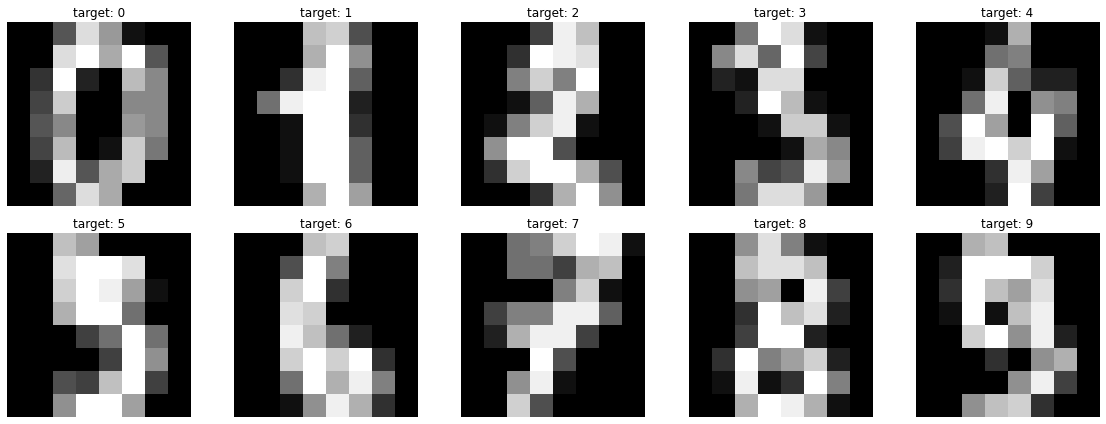

In [17]:
fig, axes = plt.subplots(2, 5, figsize=(16, 6))
for i in range(10):
    axes[i//5, i %5].imshow(mnist.images[i], cmap='gray');
    axes[i//5, i %5].axis('off')
    axes[i//5, i %5].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

In [18]:
# Data Splitting

## Define X and y
X=mnist.data
y=mnist.target

## Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

## Section A. Ensemble Methods
In this part, we will first run some simple models, then apply ensemble methods to see the performance. You will need to train TWO simple models and THREE ensemble models. When defining the model function, please use different names (you will need to call these models again in the model evaluation part).


### Question 1. Simple Models - Decision Tree (10 points)
- Train a Decision Tree model. Set "max_depth" to 6, "min_samples_split" to 2, "max_leaf_nodes" to  10, and random_state to 0.
- Report the test accuracy of the decision tree model.

In [19]:
## YOUR CODE HERE (for Decision Tree Model)
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 0, max_depth = 6, min_samples_split=2, max_leaf_nodes=10)

dt.fit(X_train, y_train)

dt.score(X_train, y_train), dt.score(X_test, y_test)

print("The train accuracy for decision tree model", dt.score(X_train, y_train) )

print("The test accuracy for decision tree model", dt.score(X_test, y_test) )



The train accuracy for decision tree model 0.6622123236822569
The test accuracy for decision tree model 0.66


### Question 2. Simple Models - Naive Bayes (10 points)
- Train a Gaussian Naive Bayes model. Leave all specifications as default. 
- Report the test accuracy of the naive bayes model.

In [20]:
# YOUR CODE HERE (for Naive Bayes Model)

# Training the Model
from sklearn.naive_bayes import GaussianNB

g_nb = GaussianNB()
g_nb.fit(X_train, y_train)
g_nb.score(X_test, y_test)

print("The test accuracy for naive bayes model is ", g_nb.score(X_test, y_test) )


The test accuracy for naive bayes model is  0.8355555555555556


### Question 3. Ensemble Methods - Random Forest (15 points)
- Train a random forest model. Specifically, train 200 decision trees (i.e., n_estimators=200). For each tree, keep specifications the same as those used in Question 1 (i.e., max_depth = 6, min_samples_split = 2, etc.)
- What is the test accuracy for the random forest?
- Compare the performance (test accuracy) of random forest and decision tree. What do you find? Briefly discuss the difference between decision tree and random forest, and how the difference would influence model performance.

In [21]:
# YOUR CODE HERE

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=200, min_samples_split=2, random_state=0, max_leaf_nodes=10, max_depth=6)
rnd_clf.fit(X_train, y_train)

print("The test accuracy for random forest model is ",rnd_clf.score(X_test, y_test))


The test accuracy for random forest model is  0.9


In [ ]:
# YOUR DISCUSSION HERE

#The test accuracy for decision tree and random model is .662 and .9 respectively, which is a huge difference, the reason for this is that a decision tree gives a single tree, whereas a random forest algorithm is a collection of  decision tree with aggregated result and is able to tackle the problem of overfitting, which is in a decision tree due to error or variance bias, hence random forest is more robust model and has a better predictive implementation due to which it gives better accuracy. 


### Question 4. Ensemble Methods - AdaBoost (15 points)
- Apply Gaussian Naive Bayes (with default settings, same as Q2) with AdaBoost. Run the Naive Bayes model 200 times. Let algorithm = "SAMME.R", learning_rate = 0.3, and random_state = 0.
- Report the test accuracy of the Naive Bayes model with AdaBoost.
- Compare the performance (test accuracy) of naive bayes with and without adaboost. Briefly discuss the role of adaboost.

In [22]:
# YOUR CODE HERE

from sklearn.ensemble import AdaBoostClassifier

# Define base model
naive_adaboost =GaussianNB()

# AdaBoost
ada_clf = AdaBoostClassifier(
    naive_adaboost, n_estimators=200, learning_rate=0.3,
    random_state=0, algorithm= "SAMME.R")

ada_clf.fit(X_train, y_train)

# Performance
print("The test accuracy for naive bayes model with adaboost is ",ada_clf.score(X_test, y_test))

The test accuracy for naive bayes model with adaboost is  0.9266666666666666


In [ ]:
# YOUR DISCUSSION HERE

#The test accuracy increases when naive bayes is done with AdaBoost, as Adaboost helps you combine multiple “weak classifiers” into a single “strong classifier” by adding more weight on difficult(weak learners) to classify instances and less on those already handled well, which  more weight on difficult to classify instances and less on those already handled well.Boosting decreases bias but increases variance. But an important point is if you want the combo AdaBoost + Naive Bayes to outperform Naive Bayes you have to have a big training data set. 


## Section B. Clustering
The MNIST dataset can also be used for clustering practice. This case, we are not classifying a digit to its corresponding label. Instead, we assume that no digit label is known, and we are simply clustering these pictures based on their similarity.


### Question 5. Clustering Prep (10 points)
We have learned two clustering methods, K-Means and DBSCAN. Both methods require scaling before applying the model. 
- Apply MinMax Scaling to our data. For result consistency, use sklearn package for minmax scaling. 
- *Hint: We do not need to split the data for unsupervised learning. Thus, the scaler should be trained on the full sample (i.e., X) rather than the training sample (i.e., X_train).*


In [23]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)


### Question 6. K-Means Clustering (10 points)
- Apply K-Means, set k=10 (as we have already known there should be 10 digits), and random state = 0. Make sure you are using the scaled data.
- Predict the cluster labels. Name the result (i.e., cluster labels) as "labels". 

In [24]:
# YOUR CODE HERE
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=10, random_state=0)
k_means.fit(X_scaled)

KMeans(n_clusters=10, random_state=0)

In [25]:
labels=k_means.predict(X_scaled)
labels

array([4, 0, 0, ..., 0, 9, 9])

### Question 7 DBSCAN (20 points)
- Apply DBSCAN, set eps to 1 and min_samples to 5. Predict the cluster labels. Name the result as "temp_clusters". 
- How many unique clusters do we have? *Hint: Consider syntax: np.unique(), which returns a list of unique cluster labels. Also consider len(), which returns the number of elements in a list.*
- Apply DBSCAN again, let eps = 1.4 and min_samples = 5. Predict the cluster labels. Name the result as "clusters". 
- How many unique clusters do we have now?
- Compare the choice of eps and the number of clusters, briefly discuss the impact of eps on cluster number.
- Given that there are 10 digits, which parameter choice would you choose? eps = 1 or eps = 1.4?

In [26]:
# YOUR CODE HERE (DBSCAN with eps = 1)
from sklearn.cluster import DBSCAN
dbclus=DBSCAN(eps=1, min_samples=5)
temp_clusters=dbclus.fit_predict(X_scaled)

print(temp_clusters)


[ 0 -1 -1 ... -1 -1 -1]


In [27]:
print("The unique clusters are",np.unique(temp_clusters))
print("The number of unique clusters is",len(np.unique(temp_clusters)))

The unique clusters are [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25]
The number of unique clusters is 27


In [29]:
# YOUR CODE HERE (DBSCAN with eps = 1.4)
from sklearn.cluster import DBSCAN
dbclus=DBSCAN(eps=1.4, min_samples=5)
clusters=dbclus.fit_predict(X_scaled)
print(clusters)
print("The unique clusters are",np.unique(clusters))
print("The number of unique clusters is",len(np.unique(clusters)))

[ 0  1 -1 ...  1  2 -1]
The unique clusters are [-1  0  1  2  3  4  5  6  7  8  9]
The number of unique clusters is 11


In [ ]:
# YOUR DISCUSSION HERE (Include the discussion for the last two problems here.)

#If a small epsilon is chosen, a large part of the data will not be clustered. Whereas, for a too high value of ε, clusters will merge and the majority of objects will be in the same cluster. So the number of eps will define the number of clusters.

#If eps is large, we will receive fewer clusters; nevertheless, since we only have 10 digits, I believe we should use 11 clusters, i.e. eps - 1.4.
#Due to the high number of clusters, lower eps may also create extra noise.

#Kmeans and dbscan have different advantages and should be used accordingly.

### Question 8. Performance of Clustering (Open Question, 10 Points)
Clustering is an unsupervised learning method and does not have a "ground truth" (i.e., the cluster label of each example). Thus, it is difficult to show the performance of clustering results. 

When working with pictures, one way to provide some evidence of clustering performance is to show some pictures within each cluster, and see if the clustering result makes sense. 

- The cell below plots 5 pictures for each cluster (kmeans clustering). Run the cell below to generate the plot. (Double check Q6 - the clustering result should be under the name "labels".)
- Discuss briefly about the clustering result. Does the method work well in this case?

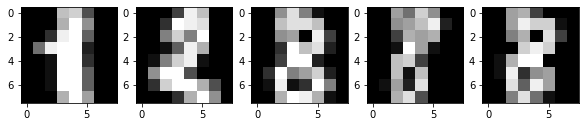

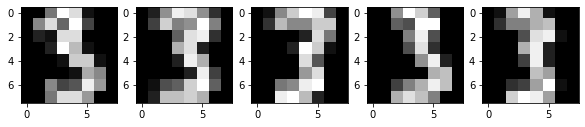

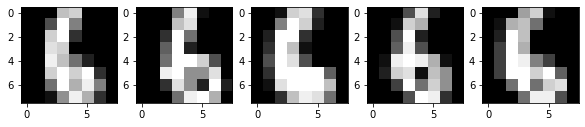

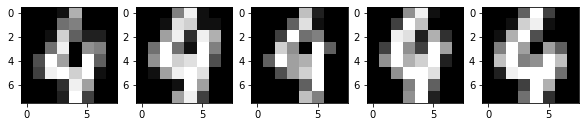

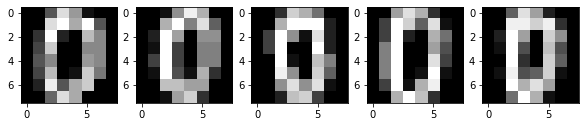

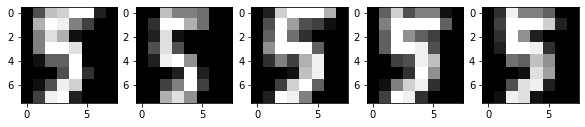

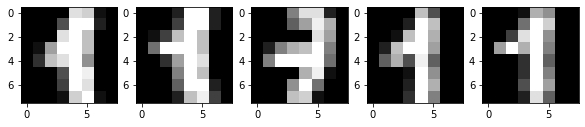

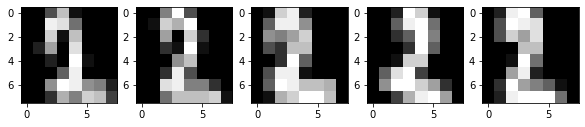

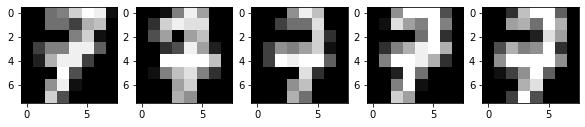

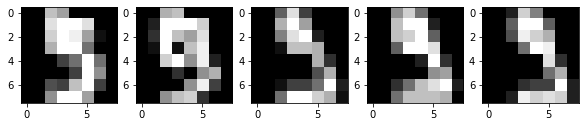

In [24]:
# RUN THIS CELL TO GET FIGURE
def draw_digit(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)
    plt.gray()

for nb in range(10):
    show_size = 5
    plt.figure(figsize=(10,10))
    count = 0

    for i in range(mnist.images.shape[0]):
        if count < show_size and labels[i] == nb:
            draw_digit(mnist.images[i].reshape(8,8), 1, show_size, count+1)
            count += 1
    plt.show()

In [ ]:
# YOUR DISCUSSION HERE

#I believe that some of the clusters, such as the numerals 3,6,4,0,5,1, are plainly visible. For certain, the clusters are visible and the model works, however for others, the clusters are not visible. As a result, in that scenario, the model isn't very useful. But it's also a perception issue and depend on how a person views it and because clustering is an unsupervised learning method, it's impossible to say how accurate it is.